# WeatherPy

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime as dt
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a1d137ce921cd24566727b1b263093ff&units=imperial&q='

In [4]:
# Create lists to hold data

city_list=[]
lat_list = []
lng_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
wind_list = []
country_list = []
date_list =[]


# Set counters to keep track of cities queried
record_count = 0
set_count = 1

# Loop through the list of cities, perform a request for data
# and print the log of processed cities

print('Beginning Data Retrieval')   
print('-----------------------------------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0  
    try:    
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
    except:
        print("*** City not found ***")
        pass
    
    print(f"Processing Record {record_count} of Set {set_count}: {city}")

print('-----------------------------------------------')
print('Data Retrieval Complete')      
print('-----------------------------------------------')

Beginning Data Retrieval
-----------------------------------------------
Processing Record 1 of Set 1: provideniya
Processing Record 2 of Set 1: yeppoon
Processing Record 3 of Set 1: puerto ayora
Processing Record 4 of Set 1: kapaa
Processing Record 5 of Set 1: brus laguna
Processing Record 6 of Set 1: hermanus
Processing Record 7 of Set 1: saraza
Processing Record 8 of Set 1: brae
Processing Record 9 of Set 1: atuona
*** City not found ***
Processing Record 10 of Set 1: nizhneyansk
Processing Record 11 of Set 1: hamilton
*** City not found ***
Processing Record 12 of Set 1: tsihombe
*** City not found ***
Processing Record 13 of Set 1: jabiru
Processing Record 14 of Set 1: adrar
Processing Record 15 of Set 1: port elizabeth
Processing Record 16 of Set 1: ushuaia
Processing Record 17 of Set 1: kitui
Processing Record 18 of Set 1: tuktoyaktuk
Processing Record 19 of Set 1: vilhena
Processing Record 20 of Set 1: ringas
Processing Record 21 of Set 1: gat
Processing Record 22 of Set 1: cai

### Convert Raw Data to DataFrame

In [5]:
# Create & display DataFrame using the retrieved data
weather_dict ={
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_list,
    "Country": country_list,
    "Date": date_list
}
weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,49.80,63,6,5.68,RU,1595124726
1,Yeppoon,-23.13,150.73,73.40,38,0,6.93,AU,1595124797
2,Puerto Ayora,-0.74,-90.35,70.00,92,79,3.00,EC,1595124797
3,Kapaa,22.08,-159.32,84.99,83,75,11.41,US,1595124797
4,Brus Laguna,15.75,-84.48,77.41,91,0,3.24,HN,1595124797
5,Hermanus,-34.42,19.23,50.00,94,12,1.01,ZA,1595124797
6,Saraza,8.74,117.78,86.65,64,30,6.35,PH,1595124797
7,Brae,60.40,-1.35,51.80,87,69,17.22,GB,1595124797
8,Atuona,-9.80,-139.03,78.96,80,47,16.44,PF,1595124797
9,Hamilton,39.18,-84.53,84.99,66,40,5.82,US,1595124756


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check maximum value of humidity
weather_data['Humidity'].max()

100

In [8]:
# None of the cities have humidity higher than 100% 
# No further data cleaning is needed
# weather_data is ready to be exported as csv

weather_data.to_csv(output_data_file ,index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

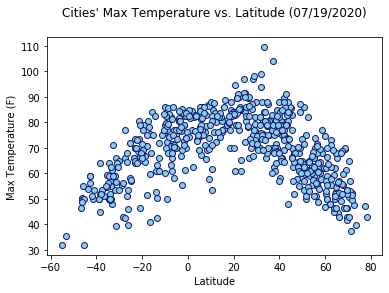

In [89]:
# Get values for plotting
latitude = weather_data['Lat']
temp = weather_data['Max Temp']

# Generate scatter plot
plt.scatter(
    latitude, temp, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title(f'Cities\' Max Temperature vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/MaxTemp_Lat.png")

In the above chart, cities' latitudes are plotted against their maximum temperatures. It is clear that temperatures of cities becomes lower when their latitudes are further away from the equator (0 degrees), whereas the coldes temperatures are noted for cities being furthest away. On the contrary, cities along the equator have the highest temperatures in the sample.

## Humidity vs. Latitude Plot

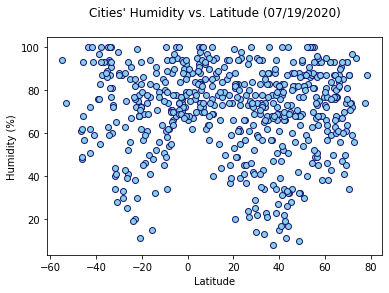

In [88]:
# Get values for plotting
humidity = weather_data['Humidity']

# Generate scatter plot
plt.scatter(
    latitude, humidity, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title(f'Cities\' Humidity vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/Humidity_Lat.png")

In the above chart, cities' latitude is plotted against their humidity. In general, there are more cities with higher humidity (e.g. > 40%) in our sample. That said, cities on different latitudes exhibit a wide range of humidity. On the other hand, there are also cities with 100% or close to 100% humidity that fall on various latitudes. There does not seem to be a strong relationship between latitude and humidty. There might be other factors contributing to a location's humidity such as proximity to the sea, which are not reflected in this chart.

## Cloudiness vs. Latitude Plot

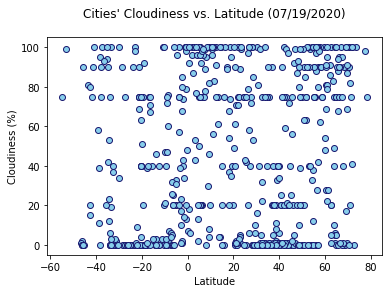

In [87]:
# Get values for plotting
cloudiness = weather_data['Cloudiness']

# Generate scatter plot
plt.scatter(
    latitude, cloudiness, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title(f'Cities\' Cloudiness vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/Cloudiness_Lat.png")

In the above chart, cities' latitude is plotted against their cloudiness. Similar to the humidity chart, cities' levels of cloudiness are quite scattered between teh 0% to 100% range. However, there are also horizontal clusters seen at around 0%, 20%, 40%, 75% and 100%. It is not immediately clear what might contribute to those clusters.

## Wind Speed vs. Latitude Plot

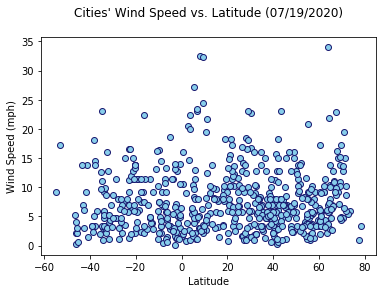

In [86]:
# Get values for plotting
wind = weather_data['Wind Speed']

# Generate scatter plot
plt.scatter(
    latitude, wind, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title(f'Cities\' Wind Speed vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/WindSpeed_Lat.png")

In the above chart, cities' latitude is plotted against their wind speed. In general, there are more cities with lower wind speeds (e.g. < 15 mph). Cities on different latitudes exhibit a wide range of wind speeds. For example, cities around the latitude of 60 degrees have wind speeds between close to 0 mph to as high as approximately 30 mph.

## Linear Regression

In [58]:
# Create Northern & Southern Hemisphere DataFrames
north_df = weather_data[weather_data['Lat'] > 0]
south_df = weather_data[weather_data['Lat'] < 0]

In [90]:
# Define function#1 for generating linear regression
def linear_regression(x,y,fc,ec):
    print(f"The correlation between both facots is {round(st.pearsonr(x, y)[0],2)}.")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker='o', facecolors=fc, edgecolors=ec)
    plt.plot(x,regress_values,"r-", color="darkblue")
    date = dt.datetime.today().strftime("%m/%d/%Y")
    return line_eq

# Define function#2 for annotating linear regression on scatter plot
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="darkblue")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both facots is -0.67.


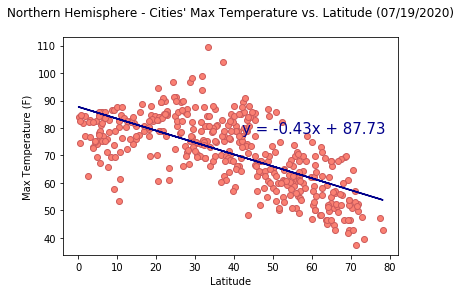

In [125]:
# Call on function#1
equation = linear_regression(north_df['Lat'], north_df['Max Temp'], 'salmon', 'indianred')

# call on function#2
annotation = annotate(equation, 42, 78)

# Format the scatter plot & save figure
plt.title(f'Northern Hemisphere - Cities\' Max Temperature vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/MaxTemp_Lat_N.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both facots is 0.73.


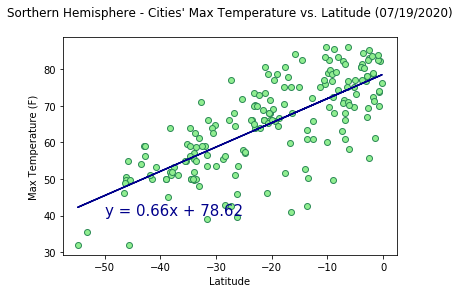

In [121]:
# Call on function#1
equation = linear_regression(south_df['Lat'], south_df['Max Temp'], 'lightgreen', 'seagreen')

# call on function#2
annotation = annotate(equation, -50, 40)

# Format the scatter plot & save figure
plt.title(f'Sorthern Hemisphere - Cities\' Max Temperature vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/MaxTemp_Lat_S.png")

#### Commentary - Max Temp vs. Latitude Linear Regression

* The linear regressions in both the Northern and Southern hemispheres charts show a strong dependence of temperature on latitude. 
* In the Northern hemisphere, the maximum temperature of a city has a negative relationship with latitude, meaning that as latitude increases (i.e. moving away from the equator), temperatures tend to drop.
* Conversely, in the Southern hemisphere, maximum temperature has a positive relationship with latitude, meaning that as latitude increases (i.e. moving towards the equator), temperatures tend to increase.
* In essence, both linear regressions show that cities cloest to the equator have highest temperature, whereas those being furthest away from the equator have the lowest temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both facots is -0.05.


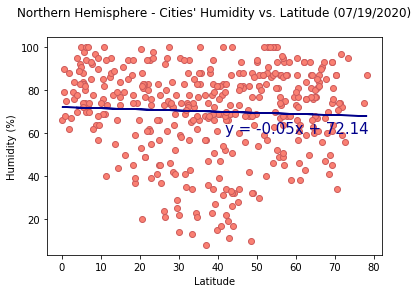

In [118]:
# Call on function#1
equation = linear_regression(north_df['Lat'], north_df['Humidity'], 'salmon', 'indianred')

# call on function#2
annotation = annotate(equation, 42, 60)

# Format the scatter plot & save figure
plt.title(f'Northern Hemisphere - Cities\' Humidity vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/Humidity_Lat_N.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both facots is 0.03.


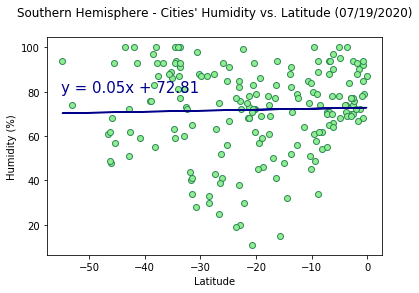

In [115]:
# Call on function#1
equation = linear_regression(south_df['Lat'], south_df['Humidity'], 'lightgreen', 'seagreen')

# call on function#2
annotation = annotate(equation, -55, 80)

# Format the scatter plot & save figure
plt.title(f'Southern Hemisphere - Cities\' Humidity vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/Humidity_Lat_S.png")

#### Commentary - Humidity (%) vs. Latitude Linear Regression

* The correlations between both factors in the Nothern and Southern hemisphere are lower than/equal to 0.05.
* The linear regression lines plotted on the charts are almost flat lines.
* Both factors probably do not have any correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both facots is -0.02.


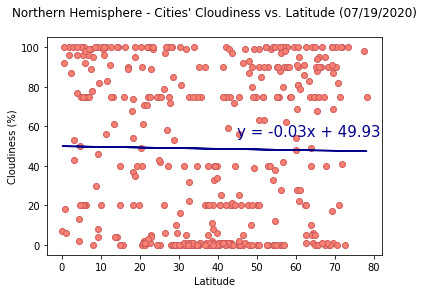

In [101]:
# Call on function#1
equation = linear_regression(north_df['Lat'], north_df['Cloudiness'], 'salmon', 'indianred')

# call on function#2
annotation = annotate(equation, 45, 55)

# Format the scatter plot & save figure
plt.title(f'Northern Hemisphere - Cities\' Cloudiness vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/Cloudiness_Lat_N.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both facots is -0.0.


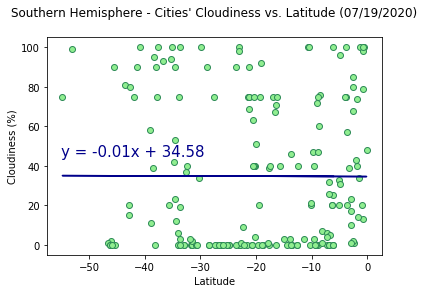

In [108]:
# Call on function#1
equation = linear_regression(south_df['Lat'], south_df['Cloudiness'], 'lightgreen', 'seagreen')

# call on function#2
annotation = annotate(equation, -55, 45)

# Format the scatter plot & save figure
plt.title(f'Southern Hemisphere - Cities\' Cloudiness vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/Cloudiness_Lat_S.png")

#### Commentary - Cloudiness (%) vs. Latitude Linear Regression

* The correlations between both factors in the Nothern and Southern hemisphere are lower than/equal to 0.02.
* The linear regression lines plotted on the charts are almost flat lines.
* Both factors probably do not have any correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both facots is -0.05.


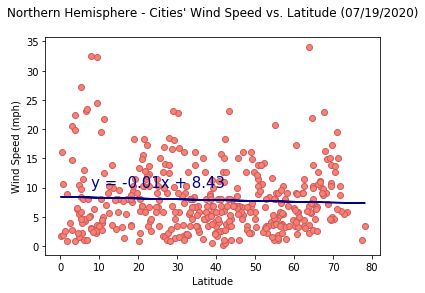

In [111]:
# Call on function#1
equation = linear_regression(north_df['Lat'], north_df['Wind Speed'], 'salmon', 'indianred')

# call on function#2
annotation = annotate(equation, 8, 10)

# Format the scatter plot & save figure
plt.title(f'Northern Hemisphere - Cities\' Wind Speed vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/WindSpeed_Lat_N.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both facots is -0.04.


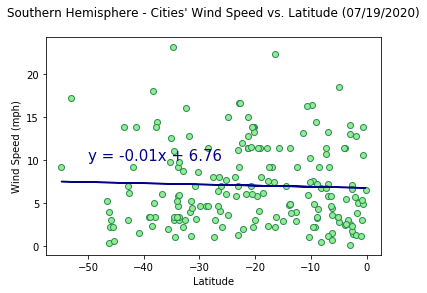

In [113]:
equation = linear_regression(south_df['Lat'], south_df['Wind Speed'], 'lightgreen', 'seagreen')

# call on function#2
annotation = annotate(equation, -50, 10)

# Format the scatter plot & save figure
plt.title(f'Southern Hemisphere - Cities\' Wind Speed vs. Latitude ({date})\n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/WindSpeed_Lat_S.png")

#### Commentary - Wind Speed (mph) vs. Latitude Linear Regression

* The correlations between both factors in the Nothern and Southern hemisphere are lower than/equal to 0.05.
* The linear regression lines plotted on the charts are almost flat lines.
* Both factors probably do not have any correlation. 